In [1]:
import numpy as np
from shapely.geometry import box
import cv2
import matplotlib.pyplot as plt
from src.visualization.visualize import show_image
from src.features.dataset import get_dataset, ImageDatasetType
from src import utils
DATASETS_BASE = os.path.join(utils.DATA_PATH, "processed")

train_set = get_dataset(
    annotations_path=os.path.join(DATASETS_BASE, "train", "annotations.csv"),
    dataset_generator_type=ImageDatasetType.BBOX_IMAGES_DATASET_GENERATOR
)

2023-01-23 21:44:35,967 - root - INFO - Loaded environment variables


2023-01-23 21:44:36.113580: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-23 21:44:36.116575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/gianfranco/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-23 21:44:36.116585: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-01-23 21:44:36,527 - tensorflow - DEBUG - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2023-01-23 21:44:36,624 - h5py._conv - DEBUG - Creating converter from 7 to 5
2023-01-23 21:44:36,624 - h5py._conv - DEBUG - Creating converter from 5 to 7
2023-01-23 21:44:36,624 - h5py._conv - DEBUG - Creating converter from 7 to 5
2023-01-23 21:44:36,625 - h5py._conv - DEBUG - Creating converter from 5 to 7


2023-01-23 21:44:37.316411: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/gianfranco/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-01-23 21:44:37.316430: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-23 21:44:37.316443: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gianfranco-HP-EliteBook-850-G8-Notebook-PC): /proc/driver/nvidia/version does not exist
2023-01-23 21:44:37.316637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the a

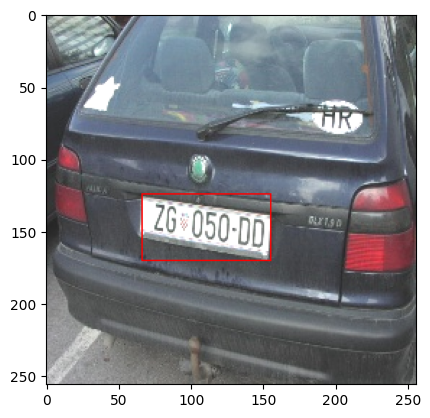

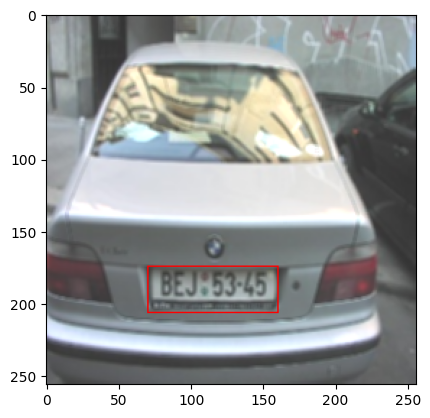

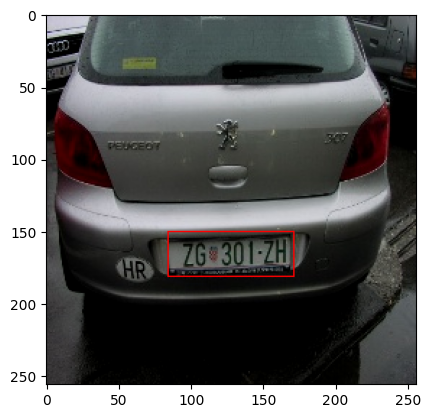

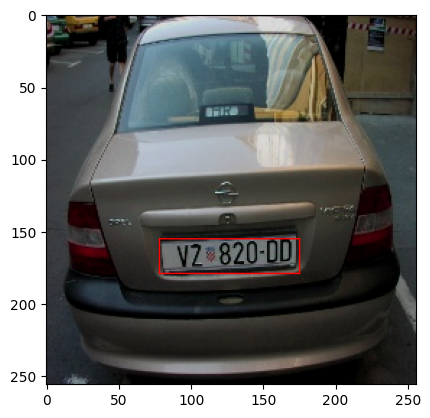

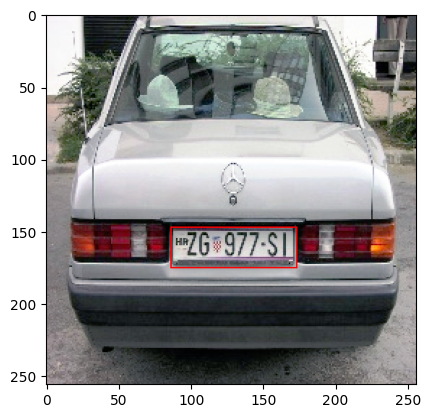

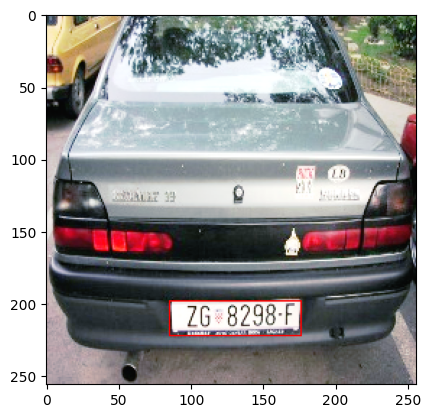

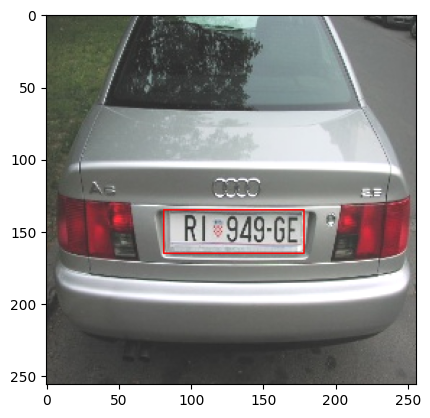

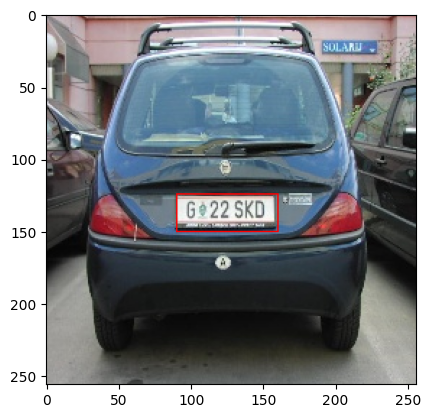

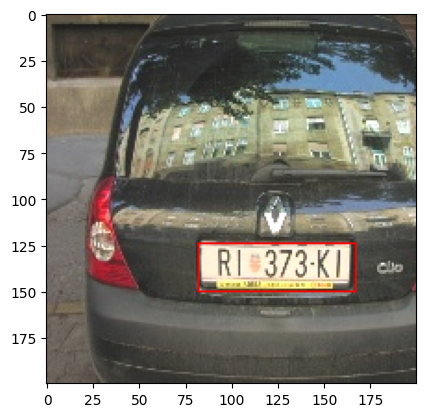

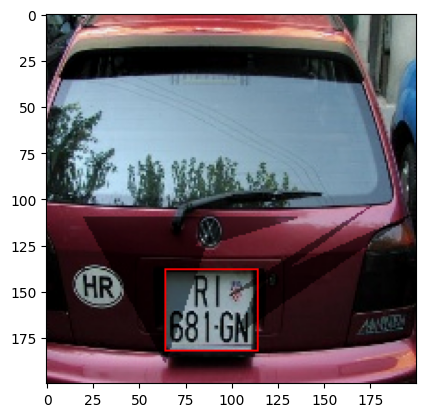

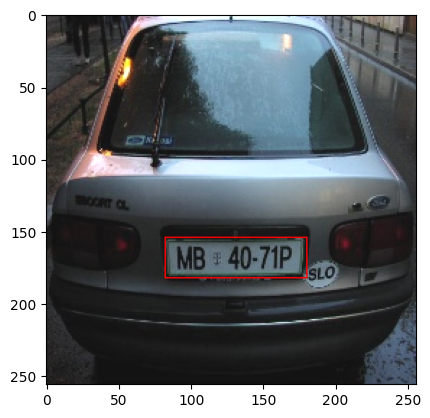

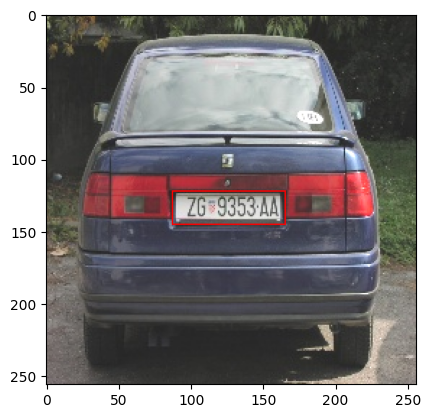

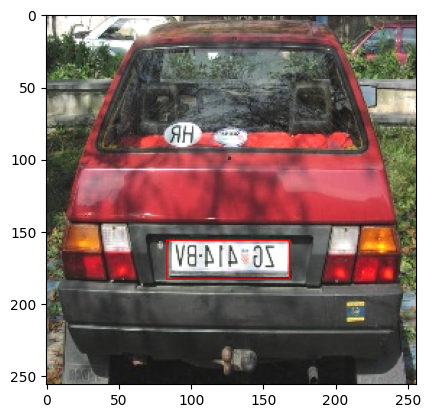

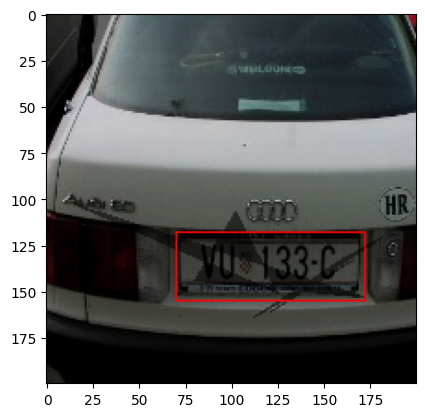

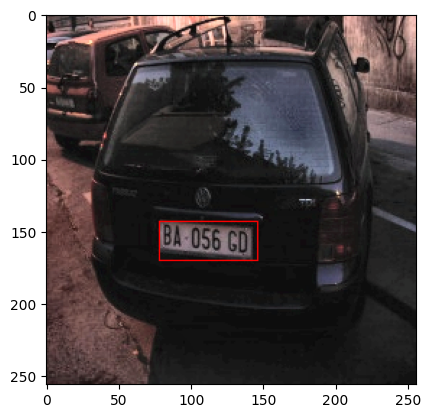

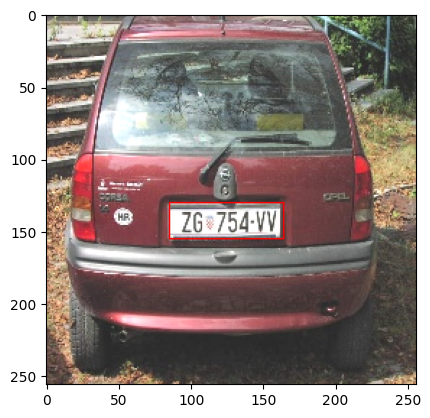

In [5]:
import albumentations as A

transform = A.Compose([
    A.RandomCrop(p=0.2, width=200, height=200),
    A.HorizontalFlip(p=0.2),
    A.Blur(p=0.1),
    A.CLAHE(p=0.1),
    A.Equalize(p=0.3),
    A.ColorJitter(p=0.1),
    A.RandomShadow(p=0.3),
    A.RandomBrightness(p=1)
], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=1, label_fields=[]))

# takes one batch of images
batch = list(train_set.take(1))[0]
images, annotations = batch[0], batch[1]

for i in range(len(images)):
    transformed = transform(image=np.array(images[i]).astype(np.uint8), bboxes=[np.array(annotations[i])])
    transformed_image = transformed['image']
    transformed_bboxes = transformed['bboxes']

    show_image(transformed_image, box(*transformed_bboxes[0]))
